In [1]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import time
import torch

In [2]:
from oles_dgh import upper_oles

In [3]:
X = np.zeros((100,100))
Y = np.zeros((100,100))
for i in range(100):
    for j in range(i+1, 100):
        X[i][j] = np.random.randint(0, 50)
        Y[i][j] = np.random.randint(0, 50)
X += X.T
Y += Y.T

In [4]:
if __name__ == "__main__":
    start = time.time()
    dGH = upper_oles(X, Y)
    print(time.time()-start)
    print(dGH)

time on c: 0.657268762588501
time on full frank-wolf: 0.20316362380981445
time on full R: 0.013664484024047852
time on full dots: 0.18204355239868164
time on check: 0.0018413066864013672
0.865807294845581
tensor(22., device='cuda:0', dtype=torch.float64)


In [ ]:
X = np.array([[0, 1, 10, 10],
           [0, 0, 10, 10],
               [0, 0, 0, 1],
              [0, 0, 0, 0]])
X += X.T
Y = np.array([[0, 1, 1, 10],
               [0, 0, 1, 10],
               [0, 0, 0, 10],
               [0, 0, 0, 0]])
Y += Y.T
start = time.time()
dGH = upper(X, Y)
print(time.time()-start)
print(dGH)

0.08551430702209473
0.5


In [5]:
def get_points_circle(n, R, x_center, y_center, z_center):
    x = np.random.uniform(x_center - R, x_center + R, n)
    y = np.random.uniform(y_center - np.sqrt(np.square(R)-np.square(x-x_center)), y_center + np.sqrt(np.square(R)-np.square(x-x_center)), n)
    z_pos_sqrt = np.sqrt(np.square(R)-np.square(x-x_center)-np.square(y-y_center))
    random_adj = np.random.choice([-1,1],len(x))
    z = random_adj * z_pos_sqrt + z_center
    return x,y,z

In [6]:
def calculate_distance(x1,y1,z1,x2,y2,z2,R):#points
    u = np.array([x1,y1,z1])
    v = np.array([x2,y2,z2])

    cosinus = np.clip(np.dot(u / np.linalg.norm(u), (v / np.linalg.norm(v)).T),-1,1)

    theta = np.arccos(cosinus)
    return R * theta

In [7]:
def compute_dgh_two_circles(x_center1, y_center1, z_center1, x_center2, y_center2, z_center2, R, n):
    x1,y1,z1 = get_points_circle(n, R, x_center1, y_center1, z_center1)
    x2,y2,z2 = get_points_circle(n, R, x_center2, y_center2, z_center2)
    X = np.zeros((n, n))
    Y = np.zeros((n,n))
    for i in range(n): #пока цикл простой пофиг
        for j in range(i+1, n):
            X[i][j] = calculate_distance(x1[i],y1[i],z1[i],x1[j],y1[j],z1[j],R)
            Y[i][j] = calculate_distance(x2[i],y2[i],z2[i],x2[j],y2[j],z2[j],R)
    X += X.T
    Y += Y.T
    #start = time.time()
    #dGH_oles = upper_oles(X,Y)
    dGH = upper(X, Y)
    #print(time.time()-start)
    #return dGH_oles
    return dGH


In [8]:
def make_k_tries(k ,x_center1, y_center1, z_center1, x_center2, y_center2, z_center2, R, n):
    dGH_mean = 0
    for i in range(k):
        dGH = compute_dgh_two_circles(x_center1, y_center1, z_center1, x_center2, y_center2, z_center2, R, n)
        dGH_mean += dGH
    return dGH_mean / k

In [9]:
def compute_dgh_two_circles_oles(x_center1, y_center1, z_center1, x_center2, y_center2, z_center2, R, n):
    x1,y1,z1 = get_points_circle(n, R, x_center1, y_center1, z_center1)
    x2,y2,z2 = get_points_circle(n, R, x_center2, y_center2, z_center2)
    X = np.zeros((n, n))
    Y = np.zeros((n,n))
    for i in range(n): #пока цикл простой пофиг
        for j in range(i+1, n):
            X[i][j] = calculate_distance(x1[i],y1[i],z1[i],x1[j],y1[j],z1[j],R)
            Y[i][j] = calculate_distance(x2[i],y2[i],z2[i],x2[j],y2[j],z2[j],R)
    X += X.T
    Y += Y.T
    #start = time.time()
    dGH_oles = upper_oles(X,Y)
    #dGH = upper(X, Y)
    #print(time.time()-start)
    return dGH_oles
    #return dGH

In [10]:
def make_k_tries_oles(k ,x_center1, y_center1, z_center1, x_center2, y_center2, z_center2, R, n):
    dGH_mean = 0
    for i in range(k):
        dGH = compute_dgh_two_circles_oles(x_center1, y_center1, z_center1, x_center2, y_center2, z_center2, R, n)
        dGH_mean += dGH
    return dGH_mean / k

In [13]:
if __name__ == "__main__":
    x_center1, y_center1, z_center1 = -10, -15, -17
    x_center2, y_center2, z_center2 = 12, 16, 11
    R = 9
    k = 1 #number of tries
    numbers = [2000]
    for number in numbers:
        start = time.time()
        print(make_k_tries_oles(k ,x_center1, y_center1, z_center1, x_center2, y_center2, z_center2, R, number))
        print(f'time: {time.time()-start}')

time on c: 263.71713852882385
time on full frank-wolf: 249.4932382106781
time on full R: 7.511458158493042
time on full dots: 234.94233536720276
time on check: 1.8369479179382324
tensor(0.4152, device='cuda:0', dtype=torch.float64)
time: 598.6753296852112


In [16]:
distances = []
if __name__ == "__main__":
    x_center1, y_center1, z_center1 = -10, -15, -17
    x_center2, y_center2, z_center2 = 12, 16, 11
    R = 9
    k = 10 #number of tries
    numbers = [5,10,50,100,300,500,1000,1500,2000]
    for number in numbers[:4]:
        start = time.time()
        distances.append(make_k_tries_oles(5 ,x_center1, y_center1, z_center1, x_center2, y_center2, z_center2, R, number).item())
        #print(f'time: {time.time()-start}')
    for number in numbers[4:]:
        start = time.time()
        distances.append(make_k_tries_oles(3 ,x_center1, y_center1, z_center1, x_center2, y_center2, z_center2, R, number).item())
        print(f'time: {time.time()-start}')

time on c: 0.03136634826660156
time on full frank-wolf: 0.022077560424804688
time on full R: 0.0037157535552978516
time on full dots: 0.016930818557739258
time on check: 0.00019669532775878906
time on c: 0.03074359893798828
time on full frank-wolf: 0.022855758666992188
time on full R: 0.0038175582885742188
time on full dots: 0.017168521881103516
time on check: 0.00016999244689941406
time on c: 0.03379368782043457
time on full frank-wolf: 0.023331403732299805
time on full R: 0.003970623016357422
time on full dots: 0.0174252986907959
time on check: 0.00017118453979492188
time on c: 0.029298067092895508
time on full frank-wolf: 0.02298593521118164
time on full R: 0.003824949264526367
time on full dots: 0.017324447631835938
time on check: 0.0001621246337890625
time on c: 0.03035759925842285
time on full frank-wolf: 0.022908687591552734
time on full R: 0.0038199424743652344
time on full dots: 0.01767873764038086
time on check: 0.0001780986785888672
time on c: 0.06673431396484375
time on ful

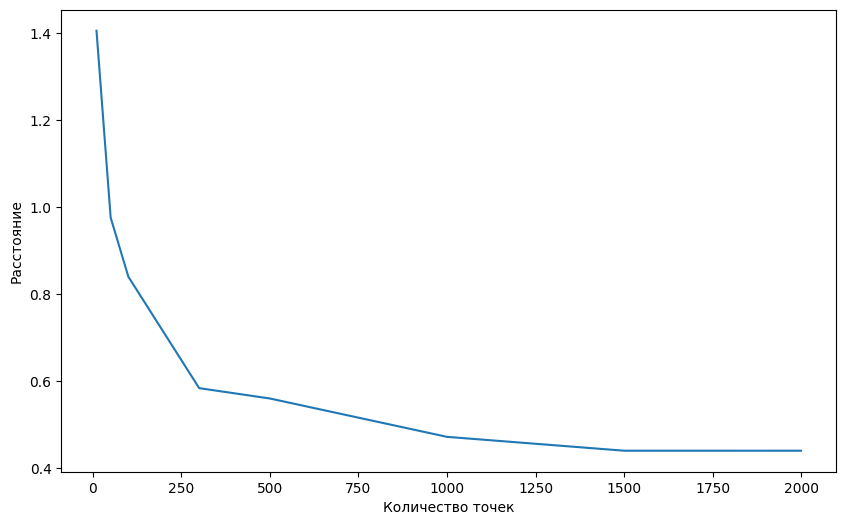

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
plt.plot(numbers[1:], distances[1:])
plt.xlabel('Количество точек')
plt.ylabel('Расстояние')
plt.show()

In [21]:
print(min(distances))

0.4397785926271756


In [ ]:
if __name__ == "__main__":
    x_center1, y_center1, z_center1 = -10, -15, -17
    x_center2, y_center2, z_center2 = 12, 16, 11
    R = 9
    k = 1 #number of tries
    numbers = [2000]
    for number in numbers:
        start = time.time()
        print(make_k_tries_oles(k ,x_center1, y_center1, z_center1, x_center2, y_center2, z_center2, R, number))
        print(f'time: {time.time()-start}')

In [ ]:
if __name__ == "__main__":
    x_center1, y_center1, z_center1 = -10, -15, -17
    x_center2, y_center2, z_center2 = 12, 16, 11
    R = 9
    k = 1 #number of tries
    numbers = [1000]
    for number in numbers:
        start = time.time()
        print(make_k_tries_oles(k ,x_center1, y_center1, z_center1, x_center2, y_center2, z_center2, R, number))
        print(f'time: {time.time()-start}')

time on c: 79.7296531200409
time on full frank-wolf: 78.17215585708618
time on full R: 3.2318058013916016
time on full dots: 71.34737396240234
time on f: 0.31336164474487305
time on g: 0.2535557746887207
0.44897536773850505
time: 174.00340247154236


In [ ]:
if __name__ == "__main__":
    x_center1, y_center1, z_center1 = -10, -15, -17
    x_center2, y_center2, z_center2 = 12, 16, 11
    R = 9
    k = 1 #number of tries
    numbers = [1000]
    for number in numbers:
        start = time.time()
        print(make_k_tries_oles(k ,x_center1, y_center1, z_center1, x_center2, y_center2, z_center2, R, number))
        print(f'time: {time.time()-start}')

0.4435441215035236
time: 226.2553949356079


In [ ]:
if __name__ == "__main__":
    x_center1, y_center1, z_center1 = -10, -15, -17
    x_center2, y_center2, z_center2 = 12, 16, 11
    R = 9
    k = 1 #number of tries
    numbers = [1000]
    for number in numbers:
        start = time.time()
        print(make_k_tries(k ,x_center1, y_center1, z_center1, x_center2, y_center2, z_center2, R, number))
        print(f'time: {time.time()-start}')

0.6240873234327713
time: 211.4914791584015


In [ ]:
if __name__ == "__main__":
    x_center1, y_center1, z_center1 = -10, -15, -17
    x_center2, y_center2, z_center2 = 12, 16, 11
    R = 9
    k = 1 #number of tries
    numbers = [2000]
    for number in numbers:
        start = time.time()
        print(make_k_tries(k ,x_center1, y_center1, z_center1, x_center2, y_center2, z_center2, R, number))
        print(f'time: {time.time()-start}')

0.4028286346574203
time: 1256.0480937957764


In [ ]:
if __name__ == "__main__":
    x_center1, y_center1, z_center1 = -10, -15, -17
    x_center2, y_center2, z_center2 = 12, 16, 11
    R = 9
    k = 1 #number of tries
    numbers = [2000]
    for number in numbers:
        start = time.time()
        print(make_k_tries_oles(k ,x_center1, y_center1, z_center1, x_center2, y_center2, z_center2, R, number))
        print(f'time: {time.time()-start}')

time on c: 553.288063287735
time on full frank-wolf: 478.6768407821655
time on full R: 11.376916646957397
time on full dots: 451.5821509361267
time on f: 0.7831676006317139
time on g: 0.8175716400146484
0.3998888115337726
time: 1095.0859456062317


In [ ]:
if __name__ == "__main__":
    x_center1, y_center1, z_center1 = -10, -15, -17
    x_center2, y_center2, z_center2 = 12, 16, 11
    R = 9
    k = 1 #number of tries
    numbers = [2000]
    for number in numbers:
        start = time.time()
        print(make_k_tries_oles(k ,x_center1, y_center1, z_center1, x_center2, y_center2, z_center2, R, number))
        print(f'time: {time.time()-start}')

time on c: 603.4774601459503
time on full frank-wolf: 597.3417661190033
time on full R: 12.530794143676758
time on full dots: 567.1814260482788
time on f: 0.8445067405700684
time on g: 0.8159785270690918
0.38511589751979974
time: 1262.774350643158
